## Analyzing Warming Temperatures in the United States

The purpose of this notebook is to investigate the changing temperatures in the United States since 1895. This data is provided by The Washington Post and can be found [here](https://github.com/washingtonpost/data-2C-beyond-the-limit-usa?tab=readme-ov-file).

Through this research, I hope to answer the following questions:
1. How have annual average temperatures changed nationally and by state over time, and which states experienced the fastest warming?
2. Which season is warming the fastest for each state, and how does this pattern vary across the United States?

It is important to monitor global warming as the increase in temperatures poses risks to major parts of infrastructure, including energy demand and water resources. Fully understanding the degree to which warming is occurring locally will help minimize the impact on our systems.

## Data Processing

There are three datasets by The Washington Post that we will be researching:
1. [`climdiv_national_year`](https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/climdiv_national_year.csv) - The mean temperature nationally each year from 1895 to 2019.
2. [`climdiv_state_year`](https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/climdiv_state_year.csv) - The mean temperature by state each year from 1895 to 2019.
3. [`model_state`](https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/model_state.csv) - The mean state temperature and season changes from 1895 to 2019.

Loading the data from each dataset:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

national_temps = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/climdiv_national_year.csv")
state_temps = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/climdiv_state_year.csv")
state_model = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-2C-beyond-the-limit-usa/refs/heads/main/data/processed/model_state.csv")

To better understand the data, let's take a look at the columns and column types:

In [5]:
print("National Temperature Columns:")
national_temps.info()
print("\n\nState Temperatures by Year Columns:")
state_temps.info()
print("\n\nState Temperature Model Columns:")
state_model.info()

National Temperature Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    125 non-null    int64  
 1   temp    125 non-null    float64
 2   tempc   125 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


State Temperatures by Year Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fips    6000 non-null   int64  
 1   year    6000 non-null   int64  
 2   temp    6000 non-null   float64
 3   tempc   6000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 187.6 KB


State Temperature Model Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -

The national temperature dataset has the year (as `year`), the temperature in fahrenheit (as `temp`) and the temperature in celcius (as `tempc`). These columns are the same in the by state dataset, with the addition of `fips`, the Federal Information Processing Standards code which uniquely identifies states. You can read more about FIPS [here](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code).

The last dataset models the temperature change over the entire range from 1895 to 2019. This dataset has columns for each season, `Fall`, `Spring`, `Summer`, `Winter`, with `Annual` representing the average annual temperature change. The last important column from this dataset is the `max_warming_season` column which is the season that is increasing the fastest in terms of temperature.

#### Data Manipulation
The `state_temps` only has the `fips` code to identify the state. So, we should add a `STATE_NAME` column like whats in `state_model`:

In [21]:
state_temps = pd.merge(state_temps, state_model[['fips', 'STATE_NAME']], on='fips')
state_temps.sort_values(by='year').head()

,fips,year,temp,tempc,STATE_NAME
1125,16,1895,41.408333,5.226852,Idaho
1500,19,1895,46.116667,7.842593,Iowa
3000,31,1895,46.675000,8.152778,Nebraska
2000,23,1895,39.366667,4.092593,Maine
4000,39,1895,48.966667,9.425926,Ohio


Now the `state_temps` dataset has the `STATE_NAME` copied from `state_model` by matching `fips` codes.

#### Limitations
The datasets used in this research only consist of data from the lower 48 states, missing Alaska and Hawaii, and only go up through 2019.

The temperature data is not representative of the climate locally within states, but the average across the locations measured in each state.

The seasons as defined in `state_model` are based on time and not the actual environment in a state. The actual time of seasons depends on their location on Earth.

## Exploratory Data Analysis
We can explore the data with some simple queries:

In [48]:
state_temps.sort_values(by='temp').head(5)

,fips,year,temp,tempc,STATE_NAME
3930,38,1950,34.900000,1.611111,North Dakota
3931,38,1951,35.616667,2.009259,North Dakota
2522,27,1917,35.675000,2.041667,Minnesota
3896,38,1916,35.733333,2.074074,North Dakota
3897,38,1917,35.916667,2.175926,North Dakota


In [46]:
state_temps[state_temps.year > 2000].sort_values(by='temp').head(5)

,fips,year,temp,tempc,STATE_NAME
3999,38,2019,38.041667,3.356481,North Dakota
3989,38,2009,38.516667,3.620370,North Dakota
2619,27,2014,38.641667,3.689815,Minnesota
3993,38,2013,38.791667,3.773148,North Dakota
3994,38,2014,38.975000,3.875000,North Dakota


In [47]:
state_temps.sort_values(by='temp', ascending=False).head(5)

,fips,year,temp,tempc,STATE_NAME
995,12,2015,73.358333,22.976852,Florida
999,12,2019,73.183333,22.879630,Florida
997,12,2017,72.841667,22.689815,Florida
970,12,1990,72.491667,22.495370,Florida
978,12,1998,72.491667,22.495370,Florida


The warmest state on average is Florida, while the coldest state on average was North Dakota, and still is North Dakota. Again, this does not include Alaska or Hawaii.

In [49]:
state_model['max_warming_season'].describe()

,max_warming_season
count,48
unique,2
top,Winter
freq,47


In [52]:
state_model[state_model.max_warming_season != 'Winter'][['STATE_NAME','max_warming_season']]

,STATE_NAME,max_warming_season
3,California,Fall


We can see that Winter is the season with the most warming, consisting of 47 out of 48 states. The other state is California with the season of Fall having the highest increase in temperature.

## Data Visualization
To help understand what the data is trying to convey, let's build some plots.

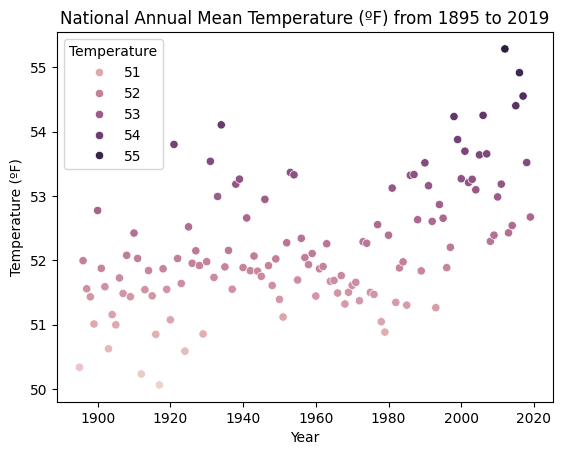

In [90]:
sns.scatterplot(national_temps, x='year', y='temp', hue='temp')
plt.title('National Annual Mean Temperature (ºF) from 1895 to 2019')
plt.xlabel('Year')
plt.ylabel('Temperature (ºF)')
plt.legend(title='Temperature')
plt.show()

This graph plots the national average temperature each year from 1895 to 2019. With an all-time low near 50 before 1920, to an all-time high of over 55 in around 2010, demonstrates the gradual but noticeable increase throughout the years.

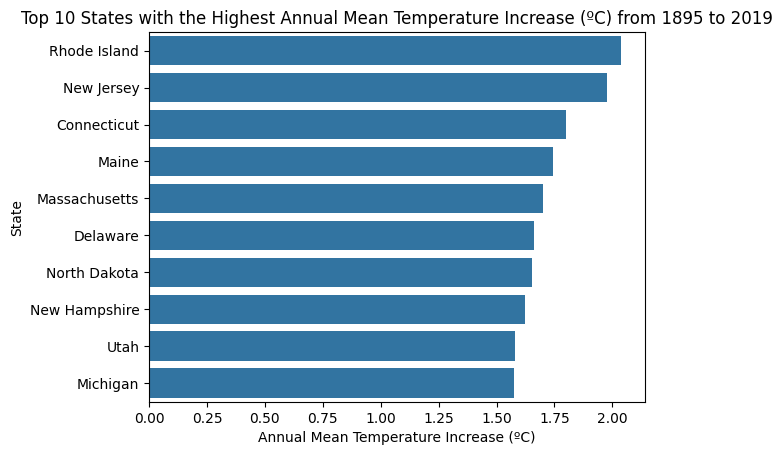

In [73]:
top10 = state_model.sort_values(by='Annual', ascending=False).head(10)
sns.barplot(top10, x='Annual', y='STATE_NAME')
plt.title('Top 10 States with the Highest Annual Mean Temperature Increase (ºC) from 1895 to 2019')
plt.xlabel('Annual Mean Temperature Increase (ºC)')
plt.ylabel('State')
plt.show()

This graph plots the top 10 states with the highest average increase in temperature from 1895 to 2019. Rhode Island has the highest average increase, but even then they do not have the highest mean annual temperature. From 10th to 1st place there is a slight curve which shows that the temperature increase is getting larger as we move to higher places on the plot.

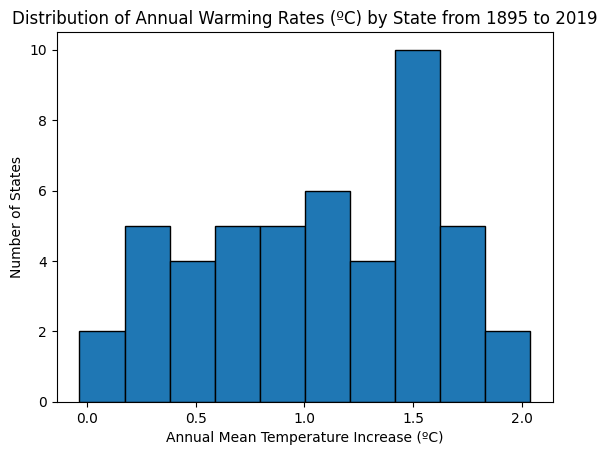

In [81]:
plt.hist(state_model['Annual'], bins=10, edgecolor='black')
plt.title('Distribution of Annual Warming Rates (ºC) by State from 1895 to 2019')
plt.xlabel('Annual Mean Temperature Increase (ºC)')
plt.ylabel('Number of States')
plt.show()

This plot shows the state frequency distribution of the same increases from the previous plot. Contrary to the previous plot, this shows us the entire dataset and not just the top 10. While it is relatively normal, there is a large spike at 1.5 ºC, which skews the frequency. There are more states with greater than 1.0 ºC of annual increase than those with less.

## Conclusion
There is an upward trend since 1895 until 2019 in annual temperature throughout the United States.

The distribution of states with warming is all over the place, some states warm very little while others warm a substantially larger amount than the rest.

The fastest warming season is Winter in every state besides California, which demonstrates the impact global warming is having on melting ice caps and the warming of the ocean.

#### What can be done?
States are warming up, and while it would take tremendous effort, time, and resources to turn the tide on global warming, we can help residents face heat waves by increasing the capacity of the energy grid and providing additional means of cooling off.

Agriculture in hot areas need to take into account the increasing temperatures as certain crops may become much harder to grow. Adjusting these cycles and investing in better irrigation system will assist.

#### Further Analysis
The datasets analyzed in this research have limitations, one being the timeframe. Updating the datasets with more relevant data will let us see if the trend is still continuing and possibly worsening. Secondly, more complex and intricate data will be needed. These datasets were means of temperatures over timeframes which is not representative of whats really going on locally. On a global scale, this can reveal good insights, but not on smaller more local scales.

## Stackholder Analysis
State and local governments have the power to help turn the tide against global warming, while other departments such as those that deal with agriculture, and water/electricity utilities, have the capibility to support the people and services that are impacted.

These policymakers ultimately determine the rules and trends that are followed which can either amplify or negate the rising temperatures.

The largest groups impacted by ever-increasing temperatures are those in housing that does not have proper air conditioning if any at all, and those who work outside for long periods of time. It is important that everyone has the same access to these resources.

## GitHub
This document is visible at https://github.com/BingCoderGuy/325-midterm.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Matthew Coletta